# Python Ad Campaign Project
# Sirui Ren

### Project Procedure 
### 1 Create a set of 1,000 usernames (strings).
### 2 Create a list of user dictionaries, 60% female.
### 3 Create a campaign dictionary.
### 4 Create a list of dictionaries. Each of these dictionaries should contain a single user dictionary and 2-8 campaign dictionaries.



In [1]:
import faker
import numpy as np
import pandas as pd
import json
import calendar
import random
from datetime import date, timedelta
from delorean import parse
from pandas import DataFrame

#make the graphs nicer
import matplotlib.pyplot as plt
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
plt.style.use('seaborn-white') #Use MatPlotLib style of my choice

# 1. Prepare User and Campaign Data
### we're going to have a list of user objects. Each user object will be linked to a number of campaign objects.

In [3]:
fake=faker.Faker()

## 1. a.Prepare User Data
## Create 1,000 unique usernames

In [4]:
usernames = set() # we will create a set containing unique data 
usernames_no = 1000

In [5]:
# I want 1,000 unique usernames,
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())
# so I loop over the length of the usernames set until it has 1,000 elements

## Get user name and gender

In [6]:
# get name and gender, and make sure 60% of users female
def get_random_name_and_gender():
    skew = .6 
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'
get_random_name_and_gender()

('Patricia Scott', 'F')

In [7]:
# Each username has now been augmented to user dict with other variables
# Each user dict is then dumped to JSON and added to the list.
def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()  
        user={
            'username':username,
            'name':name,
            'gender':gender,
            'email':fake.email(),
            'age':fake.random_int(min=18,max=90),
            'address':fake.address(),
        }
        users.append(json.dumps(user))

    return users

users = get_users(usernames)
users[:3] #check

['{"username": "christinasmith", "name": "Lisa Powell", "gender": "F", "email": "angela04@cox-hammond.biz", "age": 62, "address": "8391 Gomez Extension Suite 765\\nCarolynville, FM 34992"}',
 '{"username": "gstout", "name": "Michelle Montoya", "gender": "F", "email": "erik82@malone-ortiz.com", "age": 22, "address": "PSC 1545, Box 3068\\nAPO AE 27827"}',
 '{"username": "parkeramanda", "name": "Caitlin Harper", "gender": "F", "email": "joy06@hotmail.com", "age": 21, "address": "8590 Shaw Road\\nJamesborough, LA 06543-8123"}']

In [8]:
# define the logic to generate a campaign name and the format is:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency
def get_type():
    types = ['CPM', 'CPP', 'CPA']
    return random.choice(types)
get_type() #check

'CPA'

In [9]:
def get_start_end_dates():
    duration = random.randint(1, 2 * 365)  # duration for the campaign, which goes from 1 day to 2 years 
    offset = random.randint(-365, 365)
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    
    return _format_date(start), _format_date(end)

get_start_end_dates() #check

('20170310', '20170417')

In [10]:
def get_age():
    age = random.randint(20, 45)
    age -= age % 5   # get a date range that has multiples of 5 as extremes
    diff = random.randint(5, 25)
    diff -= diff % 5
    return '{}-{}'.format(age, age + diff)

get_age() #check

'20-25'

In [11]:
def get_gender():
    return random.choice(('M', 'F', 'B'))

get_gender() #check

'B'

In [12]:
def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

get_currency() #check

'EUR'

In [13]:
#  collector for all these puzzle pieces that returns the final campaign name
def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join(
    (type_, start_end, age, gender, currency))

get_campaign_name() #check

'CPM_20170314_20180613_35-40_F_EUR'

In [14]:
# creates a complete campaign object
# campaign data: name, budget, spent, clicks, impressions
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6)
    spent = random.randint(10**2, budget)
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))
    impressions = int(random.gauss(0.5 * 10**6, 2))
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }
get_campaign_data() #check

{'cmp_bgt': 135508,
 'cmp_clicks': 60050,
 'cmp_impr': 500002,
 'cmp_name': 'CPM_20170926_20190812_20-40_F_GBP',
 'cmp_spent': 103150}

In [15]:
# final version of the rough data
def get_data(users):
    data = []
    for user in users:
        campaigns = [get_campaign_data()
            for _ in range(random.randint(2, 8))]
        data.append({'user': user, 'campaigns': campaigns})
    return data
# each item in data is a dict with a user and a list of 
# campaigns that are associated with that user

get_data(users)[0] #check

{'campaigns': [{'cmp_bgt': 330672,
   'cmp_clicks': 42201,
   'cmp_impr': 500003,
   'cmp_name': 'CPP_20180503_20191016_35-50_M_USD',
   'cmp_spent': 157590},
  {'cmp_bgt': 471105,
   'cmp_clicks': 52729,
   'cmp_impr': 500001,
   'cmp_name': 'CPP_20170221_20170721_45-55_M_GBP',
   'cmp_spent': 222550},
  {'cmp_bgt': 933455,
   'cmp_clicks': 58957,
   'cmp_impr': 499997,
   'cmp_name': 'CPM_20181024_20181026_25-30_B_GBP',
   'cmp_spent': 336344},
  {'cmp_bgt': 998612,
   'cmp_clicks': 41169,
   'cmp_impr': 500001,
   'cmp_name': 'CPM_20180718_20200426_40-45_F_EUR',
   'cmp_spent': 923510},
  {'cmp_bgt': 780970,
   'cmp_clicks': 69363,
   'cmp_impr': 499996,
   'cmp_name': 'CPA_20180408_20180630_20-35_F_USD',
   'cmp_spent': 492072},
  {'cmp_bgt': 989836,
   'cmp_clicks': 52822,
   'cmp_impr': 500000,
   'cmp_name': 'CPM_20171008_20181217_20-35_B_GBP',
   'cmp_spent': 330848},
  {'cmp_bgt': 980372,
   'cmp_clicks': 52280,
   'cmp_impr': 500001,
   'cmp_name': 'CPA_20180712_20190525_20-3

# 2 - Cleaning the data

In [16]:
# We simulate fetching the data from a source and then inspect it
rough_data = get_data(users)
rough_data[:2]

[{'campaigns': [{'cmp_bgt': 249078,
    'cmp_clicks': 63144,
    'cmp_impr': 500003,
    'cmp_name': 'CPP_20180112_20190324_25-30_B_USD',
    'cmp_spent': 27952},
   {'cmp_bgt': 632628,
    'cmp_clicks': 76494,
    'cmp_impr': 499996,
    'cmp_name': 'CPA_20180813_20200117_40-45_F_USD',
    'cmp_spent': 317016},
   {'cmp_bgt': 134674,
    'cmp_clicks': 14187,
    'cmp_impr': 499997,
    'cmp_name': 'CPA_20180212_20180515_25-30_F_EUR',
    'cmp_spent': 78525},
   {'cmp_bgt': 986579,
    'cmp_clicks': 51807,
    'cmp_impr': 499998,
    'cmp_name': 'CPM_20170112_20171119_30-45_B_GBP',
    'cmp_spent': 401153},
   {'cmp_bgt': 278778,
    'cmp_clicks': 24634,
    'cmp_impr': 499998,
    'cmp_name': 'CPM_20170104_20170819_25-45_F_EUR',
    'cmp_spent': 170825},
   {'cmp_bgt': 963099,
    'cmp_clicks': 10418,
    'cmp_impr': 499998,
    'cmp_name': 'CPP_20171008_20171119_35-40_B_GBP',
    'cmp_spent': 775895},
   {'cmp_bgt': 790734,
    'cmp_clicks': 14191,
    'cmp_impr': 500001,
    'cmp_na

In [17]:
# transforming the data into a list whose items are campaign dicts,
# augmented with their relative user dict. Users will be duplicated in each 
#campaign they belong to
data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
data[:2]

[{'cmp_bgt': 249078,
  'cmp_clicks': 63144,
  'cmp_impr': 500003,
  'cmp_name': 'CPP_20180112_20190324_25-30_B_USD',
  'cmp_spent': 27952,
  'user': '{"username": "christinasmith", "name": "Lisa Powell", "gender": "F", "email": "angela04@cox-hammond.biz", "age": 62, "address": "8391 Gomez Extension Suite 765\\nCarolynville, FM 34992"}'},
 {'cmp_bgt': 632628,
  'cmp_clicks': 76494,
  'cmp_impr': 499996,
  'cmp_name': 'CPA_20180813_20200117_40-45_F_USD',
  'cmp_spent': 317016,
  'user': '{"username": "christinasmith", "name": "Lisa Powell", "gender": "F", "email": "angela04@cox-hammond.biz", "age": 62, "address": "8391 Gomez Extension Suite 765\\nCarolynville, FM 34992"}'}]

## Creating the DataFrame

In [18]:
# create an initial DataFrame
df = DataFrame(data)
df.head()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,249078,63144,500003,CPP_20180112_20190324_25-30_B_USD,27952,"{""username"": ""christinasmith"", ""name"": ""Lisa P..."
1,632628,76494,499996,CPA_20180813_20200117_40-45_F_USD,317016,"{""username"": ""christinasmith"", ""name"": ""Lisa P..."
2,134674,14187,499997,CPA_20180212_20180515_25-30_F_EUR,78525,"{""username"": ""christinasmith"", ""name"": ""Lisa P..."
3,986579,51807,499998,CPM_20170112_20171119_30-45_B_GBP,401153,"{""username"": ""christinasmith"", ""name"": ""Lisa P..."
4,278778,24634,499998,CPM_20170104_20170819_25-45_F_EUR,170825,"{""username"": ""christinasmith"", ""name"": ""Lisa P..."


In [19]:
# let's get a sense of how many rows there are and what is their structure.
df.count()

cmp_bgt       4997
cmp_clicks    4997
cmp_impr      4997
cmp_name      4997
cmp_spent     4997
user          4997
dtype: int64

In [20]:
df.describe()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_spent
count,4997.000000,4997.000000,4997.000000,4997.000000
mean,505678.459876,40053.112868,499999.451671,252664.387032
std,286168.193754,21657.968247,2.005077,220195.571356
min,1165.000000,717.000000,499992.000000,108.000000
25%,258167.000000,22511.000000,499998.000000,69012.000000
50%,509970.000000,37245.000000,499999.000000,188065.000000
75%,748961.000000,55166.000000,500001.000000,384440.000000
max,999963.000000,99616.000000,500007.000000,992756.000000


# 3 - Manipulating the DataFrame

In [21]:
# explode campaign name into parts and put each part in one dedicated column
def unpack_campaign_name(name): 
    # very optimistic method, assumes data in campaign 
    # assumes data in campaign name is always in good state
    type_, start, end, age, gender, currency = name.split('_')
    start = parse(start, dayfirst = False).date 
    end = parse(end, dayfirst = False).date
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(
    campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,CPP,2018-01-12,2019-03-24,25-30,B,USD
1,CPA,2018-08-13,2020-01-17,40-45,F,USD
2,CPA,2018-02-12,2018-05-15,25-30,F,EUR


### Merge two dataframes df and campaign_df

In [22]:
df= pd.merge(df, campaign_df,left_index = True,right_index = True)
df.head(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user,Type,Start,End,Age,Gender,Currency
0,249078,63144,500003,CPP_20180112_20190324_25-30_B_USD,27952,"{""username"": ""christinasmith"", ""name"": ""Lisa P...",CPP,2018-01-12,2019-03-24,25-30,B,USD
1,632628,76494,499996,CPA_20180813_20200117_40-45_F_USD,317016,"{""username"": ""christinasmith"", ""name"": ""Lisa P...",CPA,2018-08-13,2020-01-17,40-45,F,USD
2,134674,14187,499997,CPA_20180212_20180515_25-30_F_EUR,78525,"{""username"": ""christinasmith"", ""name"": ""Lisa P...",CPA,2018-02-12,2018-05-15,25-30,F,EUR


In [23]:
# now let's do the same for the JSON user object
def unpack_user_json(user):
# very optimistic as well, expects user objects
# to have all attributes
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]
user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(
    user_data.tolist(), columns=user_cols, index=df.index)
user_df.head(3)

,username,email,name,gender,age,address
0,christinasmith,angela04@cox-hammond.biz,Lisa Powell,F,62,"8391 Gomez Extension Suite 765\nCarolynville, ..."
1,christinasmith,angela04@cox-hammond.biz,Lisa Powell,F,62,"8391 Gomez Extension Suite 765\nCarolynville, ..."
2,christinasmith,angela04@cox-hammond.biz,Lisa Powell,F,62,"8391 Gomez Extension Suite 765\nCarolynville, ..."


### merge dataframe df and user_df

In [24]:
df= pd.merge(df, user_df,left_index = True, right_index = True)
df.head(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user,Type,Start,End,Age,Gender,Currency,username,email,name,gender,age,address
0,249078,63144,500003,CPP_20180112_20190324_25-30_B_USD,27952,"{""username"": ""christinasmith"", ""name"": ""Lisa P...",CPP,2018-01-12,2019-03-24,25-30,B,USD,christinasmith,angela04@cox-hammond.biz,Lisa Powell,F,62,"8391 Gomez Extension Suite 765\nCarolynville, ..."
1,632628,76494,499996,CPA_20180813_20200117_40-45_F_USD,317016,"{""username"": ""christinasmith"", ""name"": ""Lisa P...",CPA,2018-08-13,2020-01-17,40-45,F,USD,christinasmith,angela04@cox-hammond.biz,Lisa Powell,F,62,"8391 Gomez Extension Suite 765\nCarolynville, ..."
2,134674,14187,499997,CPA_20180212_20180515_25-30_F_EUR,78525,"{""username"": ""christinasmith"", ""name"": ""Lisa P...",CPA,2018-02-12,2018-05-15,25-30,F,EUR,christinasmith,angela04@cox-hammond.biz,Lisa Powell,F,62,"8391 Gomez Extension Suite 765\nCarolynville, ..."


### Search for the top 3 campaigns according to budget for each currency.

In [25]:
def top(df):
 return df.sort_index(by=['cmp_bgt'], ascending=[False]).head(3)
df.groupby('Currency').apply(top)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


cmp_bgt  cmp_clicks  cmp_impr  \
Currency                                       
EUR      3921   999963       25583    499999   
         2810   998664       35189    500000   
         4817   998136       11380    499998   
GBP      3865   999767       12670    500000   
         2718   999710       29353    500003   
         2631   999632       40708    499997   
USD      1888   999358       12568    500004   
         4016   998105       39996    499997   
         4159   997883       79001    499999   

                                        cmp_name  cmp_spent  \
Currency                                                      
EUR      3921  CPM_20180825_20200105_35-40_M_EUR     971745   
         2810  CPP_20161231_20170206_35-40_B_EUR     245677   
         4817  CPM_20180402_20190627_30-50_B_EUR     382568   
GBP      3865  CPP_20180902_20190506_20-25_B_GBP     413488   
         2718  CPM_20170506_20180916_35-45_F_GBP      44832   
         2631  CPM_20171207_20190731_30-45_F_GBP     794310   
USD      1888  CPM_20170917_20190305_25-45_M_USD     795092   
         4016  CPP_20170920_20181130_30-45_M_USD     706347   
         4159  CPA_20171116_20190312_30-35_M_USD     992756   

                                                            user Type  \
Currency                                                                
EUR      3921  {"username": "jesusduke", "name": "Angela Murp...  CPM   
         2810  {"username": "lwallace", "name": "Cristina Mit...  CPP   
         4817  {"username": "wsanchez", "name": "Bryan Bell",...  CPM   
GBP      3865  {"username": "abailey", "name": "Michael Smith...  CPP   
         2718  {"username": "ashley09", "name": "Kathleen Dou...  CPM   
         2631  {"username": "heather62", "name": "Joshua Pope...  CPM   
USD      1888  {"username": "gregory77", "name": "Joseph Blai...  CPM   
         4016  {"username": "waynejackson", "name": "Richard ...  CPP   
         4159  {"username": "smithsarah", "name": "Whitney Wi...  CPA   

                    Start         End    Age Gender Currency      username  \
Currency                                                                     
EUR      3921  2018-08-25  2020-01-05  35-40      M      EUR     jesusduke   
         2810  2016-12-31  2017-02-06  35-40      B      EUR      lwallace   
         4817  2018-04-02  2019-06-27  30-50      B      EUR      wsanchez   
GBP      3865  2018-09-02  2019-05-06  20-25      B      GBP       abailey   
         2718  2017-05-06  2018-09-16  35-45      F      GBP      ashley09   
         2631  2017-12-07  2019-07-31  30-45      F      GBP     heather62   
USD      1888  2017-09-17  2019-03-05  25-45      M      USD     gregory77   
         4016  2017-09-20  2018-11-30  30-45      M      USD  waynejackson   
         4159  2017-11-16  2019-03-12  30-35      M      USD    smithsarah   

                                      email                name gender  age  \
Currency                                                                      
EUR      3921            kevinlam@gmail.com       Angela Murphy      F   35   
         2810                sdyer@ford.org   Cristina Mitchell      F   55   
         4817            owarner@franco.com          Bryan Bell      M   61   
GBP      3865             ismith@garcia.biz       Michael Smith      M   89   
         2718               tlewis@hall.com  Kathleen Dougherty      F   47   
         2631      gesparza@nolan-clark.com         Joshua Pope      M   39   
USD      1888  antonio89@saunders-parks.com        Joseph Blair      M   88   
         4016           lturner@hotmail.com        Richard Boyd      M   58   
         4159              mark46@yahoo.com       Whitney Wiley      F   75   

                                                         address  
Currency                                                          
EUR      3921  1232 Ware Bypass Apt. 827\nNorth Michaelhaven,...  
         2810     978 Joseph Trail Suite 948\nBradyton, PR

### Search for the bottom 3 campaigns according to budget for each currency.

In [26]:
def bottom(df):
 return df.sort_index(by=['cmp_bgt'], ascending=[False]).tail(3)
df.groupby('Currency').apply(bottom)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


cmp_bgt  cmp_clicks  cmp_impr  \
Currency                                       
EUR      360      2217       45158    500000   
         1585     1745       62905    500002   
         964      1391       30115    500001   
GBP      2422     4072       25308    499997   
         3906     3750       22505    500003   
         391      1595       23586    500002   
USD      4283     2546       27659    500001   
         4818     1676       31308    499997   
         281      1165       10145    499999   

                                        cmp_name  cmp_spent  \
Currency                                                      
EUR      360   CPM_20170930_20180423_45-60_F_EUR       1048   
         1585  CPP_20180925_20190316_25-35_B_EUR        616   
         964   CPA_20170323_20180522_25-35_M_EUR        732   
GBP      2422  CPA_20181029_20190701_25-40_B_GBP       3606   
         3906  CPP_20180622_20180904_35-45_F_GBP        578   
         391   CPM_20171122_20190426_20-35_F_GBP       1507   
USD      4283  CPA_20170514_20180823_25-45_F_USD        542   
         4818  CPM_20171117_20190720_40-45_B_USD        589   
         281   CPA_20180622_20180728_30-35_F_USD        894   

                                                            user Type  \
Currency                                                                
EUR      360   {"username": "timothy13", "name": "David Odonn...  CPM   
         1585  {"username": "laurahicks", "name": "Stacey Whi...  CPP   
         964   {"username": "jesse92", "name": "Zachary Garza...  CPA   
GBP      2422  {"username": "levans", "name": "Marie Camacho"...  CPA   
         3906  {"username": "tmorrison", "name": "John Moreno...  CPP   
         391   {"username": "ojensen", "name": "Diane Graham"...  CPM   
USD      4283  {"username": "briannajones", "name": "Hailey C...  CPA   
         4818  {"username": "victoria82", "name": "Edward Smi...  CPM   
         281   {"username": "skinnerkeith", "name": "Angela W...  CPA   

                    Start         End    Age Gender Currency      username  \
Currency                                                                     
EUR      360   2017-09-30  2018-04-23  45-60      F      EUR     timothy13   
         1585  2018-09-25  2019-03-16  25-35      B      EUR    laurahicks   
         964   2017-03-23  2018-05-22  25-35      M      EUR       jesse92   
GBP      2422  2018-10-29  2019-07-01  25-40      B      GBP        levans   
         3906  2018-06-22  2018-09-04  35-45      F      GBP     tmorrison   
         391   2017-11-22  2019-04-26  20-35      F      GBP       ojensen   
USD      4283  2017-05-14  2018-08-23  25-45      F      USD  briannajones   
         4818  2017-11-17  2019-07-20  40-45      B      USD    victoria82   
         281   2018-06-22  2018-07-28  30-35      F      USD  skinnerkeith   

                                       email               name gender  age  \
Currency                                                                      
EUR      360        danielhinton@hotmail.com     David Odonnell      M   58   
         1585   novakashley@dorsey-allen.net    Stacey Whitaker      F   34   
         964                ssmith@yahoo.com      Zachary Garza      M   88   
GBP      2422              david64@yahoo.com      Marie Camacho      F   35   
         3906          aaronmiller@gmail.com        John Moreno      M   75   
         391    berrychristopher@hotmail.com       Diane Graham      F   85   
USD      4283     jessicamorgan@gonzalez.com  Hailey Cunningham      F   81   
         4818  mitchelljennifer@davidson.biz       Edward Smith      M   82   
         281         shannonjensen@davis.org       Angela Woods      F   38   

                                                         address  
Currency                                                          
EUR      360   85282 Miles Orchard Suite 516\nMichaelmouth, W...  
         1585        09392 Foley Motorway\nGarciamouth, CO

In [27]:
# now we have the DataFrame completely expanded
# fix the column names
better_columns = [
    'Budget', 'Clicks', 'Impressions',
    'cmp_name', 'Spent', 'user',
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
df.columns = better_columns

In [28]:
# add three other columns
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
calculate_extra_columns(df)

In [29]:
# take a look
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,27952,63144,500003,0.126287,0.442671,0.055904
1,317016,76494,499996,0.152989,4.144325,0.634037
2,78525,14187,499997,0.028374,5.534997,0.157051


In [30]:
# verify the accuracy of the results manually for the first row
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]
CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]
print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.126287242277 0.126287242277
CPC: 0.442670720892 0.442670720892
CPI: 0.055903664578 0.055903664578


In [31]:
# add the name of the Day when campaign starts and duration of the campaign
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()] #tells us which day of the week that date is

def get_duration(row):
    return (row['End'] - row['Start']).days 
#perform a subtraction between a campaign end and start dates

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)
# instruct Pandas to perform that operation on the rows

In [32]:
# let's verify
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2018-01-12,2019-03-24,436,Friday
1,2018-08-13,2020-01-17,522,Monday
2,2018-02-12,2018-05-15,92,Monday


In [33]:
# now let's get rid of the cmp_name and user columns,
# which we don't need any more, and address too
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
    'Name', 'Gender', 'Age'
]
df = df[final_columns]

## 4 - Saving to a file in different formats

In [34]:
# CSV format
# df.to_csv('df.csv')

In [35]:
# JSON format
# df.to_json('df.json')

In [36]:
# Spreadsheet format
# df.to_excel('df.xls')

## 5 - Visualizing results

In [37]:
%matplotlib inline

In [38]:
import pylab
pylab.rcParams.update({'font.family' : 'serif'})
#tells Pylab to use the first available serif font

In [39]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,368.846508,505678.459876,40053.112868,499999.451671,252664.387032,0.080106,9.946489,0.505329,53.867521
std,210.075551,286168.193754,21657.968247,2.005077,220195.571356,0.043316,17.576180,0.440392,20.910233
min,1.000000,1165.000000,717.000000,499992.000000,108.000000,0.001434,0.003246,0.000216,18.000000
25%,193.000000,258167.000000,22511.000000,499998.000000,69012.000000,0.045022,1.875889,0.138024,36.000000
50%,364.000000,509970.000000,37245.000000,499999.000000,188065.000000,0.074490,5.166151,0.376131,53.000000
75%,555.000000,748961.000000,55166.000000,500001.000000,384440.000000,0.110333,11.602468,0.768883,72.000000
max,730.000000,999963.000000,99616.000000,500007.000000,992756.000000,0.199231,559.587370,1.985516,90.000000


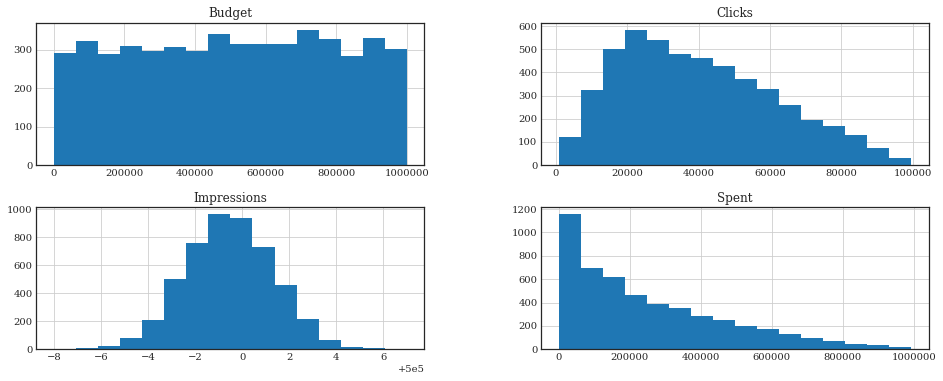

In [40]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));

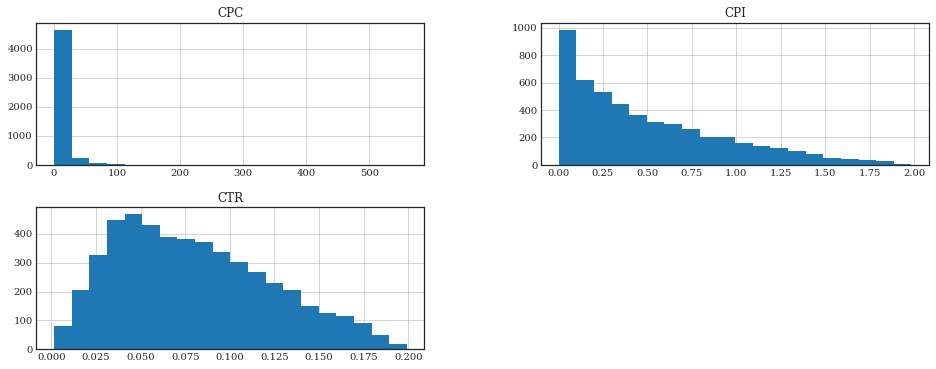

In [41]:
df[['CTR', 'CPC', 'CPI']].hist(bins=20, figsize=(16, 6));

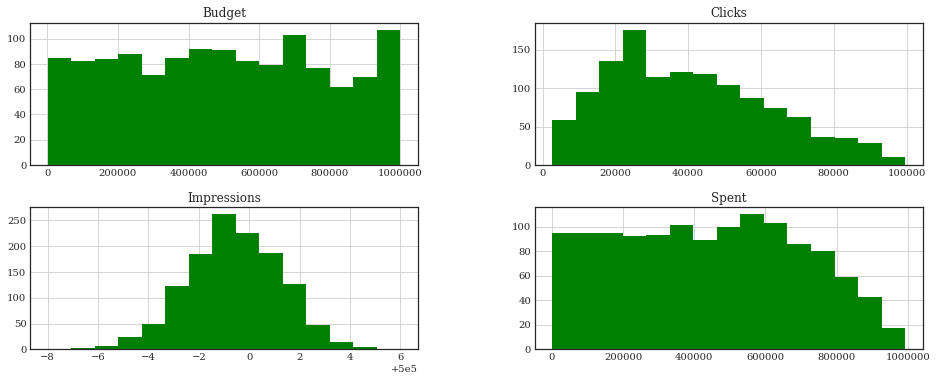

In [42]:
# campaigns whose spent is > than 75% of the budget
mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
bins=15, figsize=(16, 6), color='g');

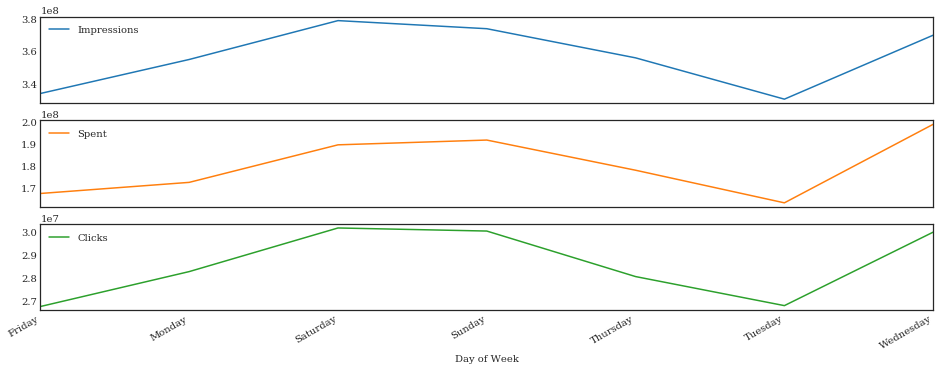

In [43]:
# Let's aggregate per Day of the Week
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
figsize=(16, 6), subplots=True);
# The option subplots=True makes plot draw three independent graphs

In [44]:
# Let's aggregate per gender
agg_config = {
    'Impressions': {
        'Mean Impr': 'mean',
        'Std Impr': 'std',
    },
    'Spent': ['mean', 'std'],
}
df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Impressions                    Spent  \
                              Mean Impr  Std Impr           mean   
Target Gender Target Age                                           
B             20-25       499999.671875  1.860659  254924.843750   
              20-30       499999.753086  1.971870  278111.543210   
              20-35       499999.469136  1.878074  263975.530864   
              20-40       499999.159420  1.975014  225939.217391   
              20-45       499998.733333  1.791514  298451.333333   
              25-30       499999.625000  2.063991  237400.011364   
              25-35       499999.467532  2.074814  236980.922078   
              25-40       499999.313433  2.336852  223886.597015   
              25-45       499999.985294  1.670576  236919.088235   
              25-50       499999.066667  1.667619  191700.600000   
              30-35       499999.360000  2.166327  285110.600000   
              30-40       499999.848485  1.899331  333365.015152   
              30-45       499999.566265  2.113792  248325.554217   
              30-50       499999.666667  2.015704  248113.133333   
              30-55       499999.450000  2.235479  194270.250000   
              35-40       499999.507246  2.083713  283274.739130   
              35-45       499999.550725  2.054666  250026.550725   
              35-50       499999.542857  1.923807  260099.485714   
              35-55       499999.428571  2.061097  234709.077922   
              35-60       500000.000000  2.572039  219378.928571   
              40-45       499999.728571  2.006666  282696.242857   
              40-50       499999.456790  1.917351  258387.012346   
              40-55       499999.582278  2.169767  247667.797468   
              40-60       499999.405797  1.980187  193358.449275   
              40-65       499999.500000  1.080123  207664.800000   
              45-50       499998.090909  2.119177  273950.545455   
              45-55       499999.680000  1.908752  240095.680000   
              45-60       500000.153846  1.951331  224219.538462   
              45-65       499999.666667  1.414214  279659.777778   
              45-70       499998.800000  1.483240  193630.600000   
...                                 ...       ...            ...   
M             20-25       499999.136364  1.995292  268956.125000   
              20-30       499999.493671  2.031000  279216.139241   
              20-35       499999.416667  1.941032  236113.000000   
              20-40       499999.372093  2.331606  216661.186047   
              20-45       500000.000000  2.614065  157368.769231   
              25-30       499999.234568  1.899155  284699.308642   
              25-35       499999.703125  1.769940  242956.046875   
              25-40       499999.500000  1.696187  289158.290323   
              25-45       499999.584416  2.117289  215873.896104   
              25-50       499999.000000  2.000000  197444.733333   
              30-35       499999.426829  1.798700  258136.317073   
              30-40       499999.324675  2.022515  243701.675325   
              30-45       499999.275510  2.119038  258918.704082   
              30-50       499999.219178  1.742018  223812.794521   
              30-55       499999.000000  2.374103  149296.750000   
              35-40       499999.235294  1.829425  276853.455882   
              35-45       499999.328125  2.131060  254448.718750   
              35-50       499999.291139  1.755226  264156.632911   
              35-55       499999.478261  2.048017  315681.855072   
              35-60       499999.150000  1.496487  288474.300000   
              40-45       499999.528571  2.069246  288178.928571   
              40-50       499999.500000  2.119561  236561.955882   
              40-55       499999.388235  2.160766  267199.776471   
              40-60       499999.194030  2.068807  245944.910448   
              40-65       499998.866667  1.187234  125650.600000   
              45

In [45]:
# create a pivot table that shows us the correlation between 
# the target age and impressions, clicks, and spent.
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Clicks                   Impressions                      \
Target Gender        B        F        M           B         F         M   
Target Age                                                                 
20-25          2685825  2643276  3582064    31999979  35499958  43999924   
20-30          3066277  3331468  3112848    40499980  40499967  39499960   
20-35          3114928  3464170  2996675    40499957  45499937  35999958   
20-40          2762419  2483224  3521961    34499942  30999972  42999946   
20-45           568584   419697   508475     7499981   5499992   6500000   
25-30          2916089  3734690  3286188    43999967  47499954  40499938   
25-35          3290494  2693019  2569098    38499959  32499968  31999981   
25-40          3001849  2841870  2462984    33499954  35499949  30999969   
25-45          2900384  2665866  3008264    33999999  33999951  38499968   
25-50           663791   713042   534907     7499986   7499990   7499985   
30-35          2916842  2664751  3369089    37499952  34000018  40999953   
30-40          2900903  2594742  3201951    32999990  30499953  38499948   
30-45          3539185  2487978  3785435    41499964  32499982  48999929   
30-50          3099595  3228874  3014406    37499975  45499909  36499943   
30-55           806625   554262   437119     9999989   6999990   5999988   
35-40          2574234  3329292  2884899    34499966  43999937  33999948   
35-45          2759512  3851938  2496616    34499969  49999978  31999957   
35-50          2804113  4065663  3240591    34999968  48499950  39499944   
35-55          2877854  2858893  2644435    38499956  39499958  34499964   
35-60           336713   698905   655606     7000000   7999988   9999983   
40-45          2851306  4180201  2791367    34999981  51499925  34999967   
40-50          3452265  3183853  2774573    40499956  39499966  33999966   
40-55          3225645  3627679  3626089    39499967  42999947  42499948   
40-60          2827034  2973520  2781509    34499959  36999987  33499946   
40-65           318511   692085   545876     4999995   7499986   7499983   
45-50           404941   633867   478958     5499979   7499984   5999985   
45-55          1104152   871479   183446    12499992  10499966   3999989   
45-60           524720   558733   690436     6500002   7999996   8499999   
45-65           853778   571003   612651     8999994   6499993   7499996   
45-70           184403   258078   137800     2499994   1999995    999997   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          16315190  18627699  23668139  
20-30          22527035  19234895  22058075  
20-35          21382018  27097427  17000136  
20-40          15589806  15319288  18632862  
20-45           4476770   3128587   2045794  
25-30          20891201  23704601  23060644  
25-35          18247531  15472512  15549187  
25-40          15000402  17517051  17927814  
25-45          16110498  17844483  16622290  
25-50           2875509   2945764   2961671  
30-35          21383295  18270911  21167178  
30-40          22002091  12334970  18765029  
30-45          20611021  14819153  25374033  
30-50          18608485  21169506  16338334  
30-55           3885405   3704476   1791561  
35-40          19545957  22110618  18826035  
35-45          17251832  24482690  16284718  
35-50          18206964  28069324  20868374  
35-55          18072599  21318248  21782048  
35-60           3071305   4490302   5769486  
40-45          19788737  25749613  20172525  
40-50          20929348  17931615  16086213  
40-55          19565756  19050185  22711981  
40-60          13341733  18057713  16478309  
40-65           2076648   4961259   1884759  
45-50           3013456   5138092   2332020  
45-55           6002392   3579318   3170090  
45-60           2914854   3931586   5188987  
45-65           5033876   2372908   4214604  
45-70            968153   1056587  

### Create a new visual

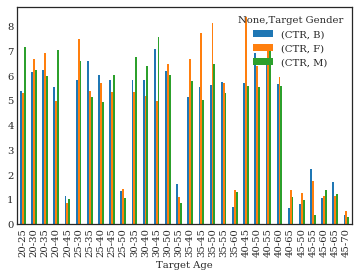

In [46]:
pd.pivot_table(df, values=['CTR'],index=['Target Age'], columns=['Target Gender'], aggfunc=np.sum).plot(kind= 'bar')
# this graph shows clicks per rate based on gender
# click per rate measures the success of an online advertising campaign
# we can see that female with ages 25-30, 30-45, and 40-55 are more likely to click the ads
# and males with ages 30-50, and 40-45 are more likely to click the ads
# we can adjust our ad campaign based on the result.

## Suggested product idea

*  From 'day of week' graph, we can see that for all of impression, spend, and clicks, Friday and Thursday have better performance, so we might want to strength ad campaign on Thursday and Friday
*  From the CTR based on gender graph, we conclude that female with ages 25-30, 30-45, and 40-55; and males with ages 30-50, and 40-45 are more likely to click the ads. Based on this result, we could adjust our campaign strategy. For example, if a product focuses on female, we might want to design ads that target to younger women. 
